## Kaggle Titanic competition

In [292]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Training Data Set
#### Read traing data set

In [274]:
train = pd.read_csv('D:/kaggle/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Get number of Rows and Columns

In [275]:
train.shape

(891, 12)

#### Summrizing the data

In [276]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Using correlation matrix to know how variables related to each others

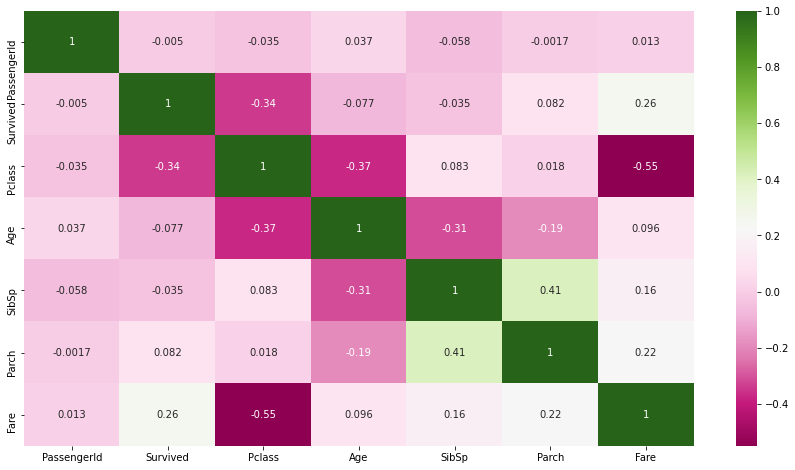

In [278]:
torr = train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(torr,annot = True, cmap = 'PiYG')

#### drop all columns except Survived, Pclass, Age, and Fare

In [279]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1, inplace=True )

#### Find the number of missing values in each column

In [280]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

### Missing Value treatment

In [281]:
train['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Filling missing values in age column with the its mean

In [282]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [283]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

##### No Missing Values!

### Relation Between Survived and PClass Columns

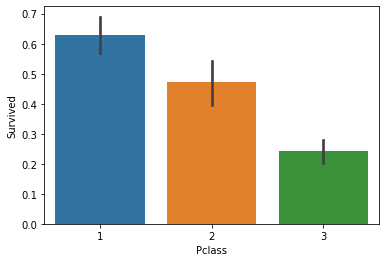

In [295]:
sns.barplot(x ='Pclass', y = 'Survived', data = train)

### Relation Between Survived and Sex Columns

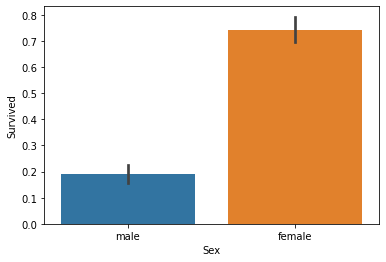

In [286]:
sns.barplot(x ='Sex', y = 'Survived', data = train)

### Relation Between Survived and Age Columns

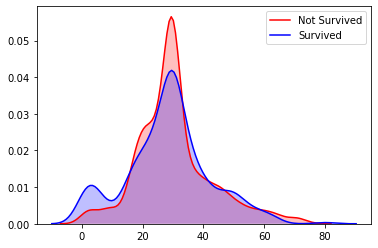

In [287]:
sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'],shade=True,color='r',label='Not Survived')
sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'],shade=True,color='b',label='Survived' )

### Get dummy variables for Column sex since it is categorical value

In [288]:
sex_dummies=pd.get_dummies(train['Sex'],drop_first=True)
train= pd.concat([train,sex_dummies],axis=1)
train.drop(['Sex'], axis=1, inplace=True )
train.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


### Standardization

In [289]:
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()

In [290]:
feature_scale = ['Age','Fare']
train[feature_scale] = sts.fit_transform(train[feature_scale])

### Store Survived Column in Y

In [291]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

### Use KNeighborsClassifier Model

In [293]:
#create param
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

### Model Evaluation

In [294]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [296]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.776725,{'criterion': 'gini'}
1,KNeighborsClassifier,0.802492,{'n_neighbors': 5}
2,SVC,0.811481,"{'C': 100, 'kernel': 'rbf'}"


In [297]:
model_svc = SVC( C= 100,kernel='rbf')
model_svc.fit(X, y)

SVC(C=100)

### Testing data Set

In [298]:
#Read 
test1 = pd.read_csv('D:/kaggle/titanic/test.csv')
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Drop all columns except Pclass, Sex, Age, and Fare

In [299]:
test=test1.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )
test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

### Filling missing values with its mean value

In [301]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [302]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

### Get dummy variables for Column sex since it is categorical value

In [303]:
sex_dummies=pd.get_dummies(test['Sex'],drop_first=True)
test= pd.concat([test,sex_dummies],axis=1)
test.drop(['Sex'], axis=1, inplace=True )

####  Fit the model to the data, then transform the data according to the fitted model

In [305]:
test[feature_scale] = sts.fit_transform(test[feature_scale])
test.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


### Store PassengerId and Survived (Predicted data) into CSV file

In [307]:
y_predicted = model_svc.predict(test)

In [308]:
submission = pd.DataFrame({
        "PassengerId": test1['PassengerId'],
        "Survived": y_predicted
    })

In [314]:
submission.to_csv('titanic_submission.v3.csv', index=False)